In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [42]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### `Feature Engineering`

In [43]:
Male = pd.get_dummies(data['sex'] , drop_first=True)
data = pd.concat([data , Male] , axis=1)
data.head()


,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [44]:
Smoker = pd.get_dummies(data['smoker'] , drop_first=True)
data = pd.concat([data , Smoker] , axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [45]:
data = data.rename(columns={'yes':'Smoker'})

In [46]:
region = pd.get_dummies(data['region'] , drop_first=True)
data = pd.concat([data , region] , axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


In [47]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


C:\Users\Satyam\AppData\Local\Temp\ipykernel_35176\3969607923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data= data, palette = 'pastel')


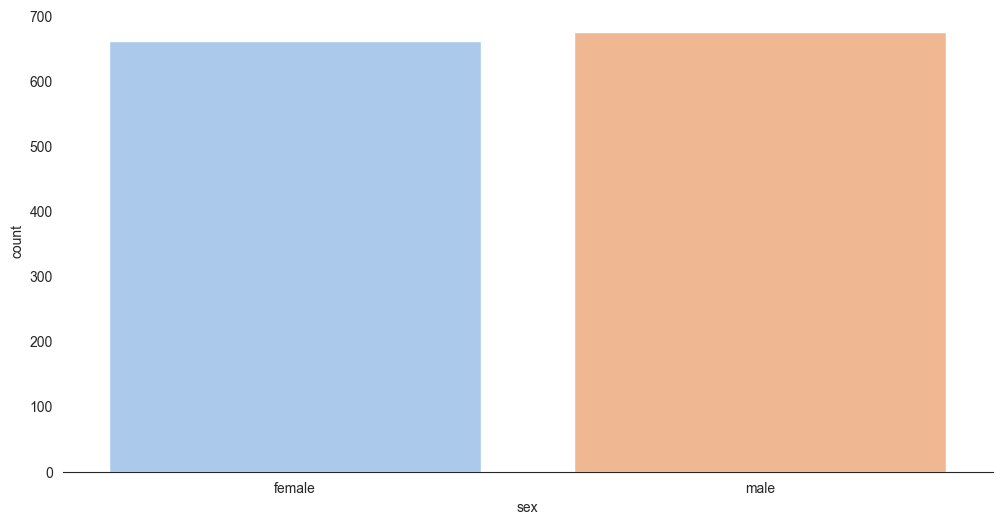

In [48]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= data, palette = 'pastel')
sns.despine(left = True)

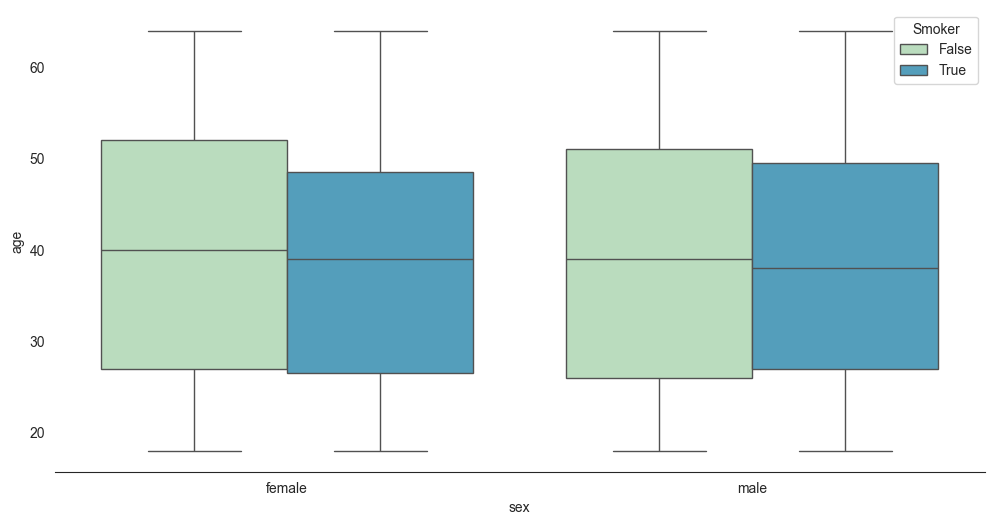

In [50]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y='age', data= data, palette = 'GnBu' , hue='Smoker')
sns.despine(left = True)

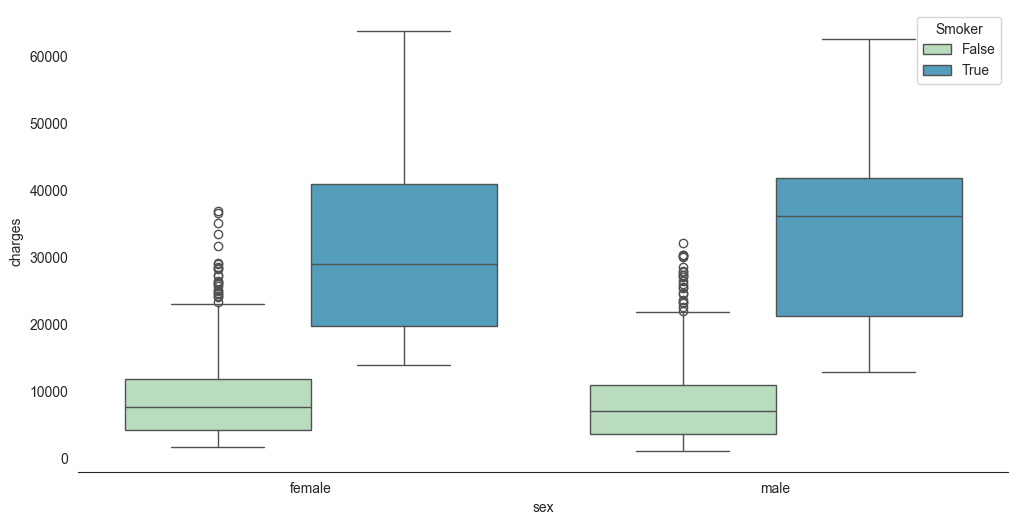

In [51]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y='charges', data= data, palette = 'GnBu' , hue='Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

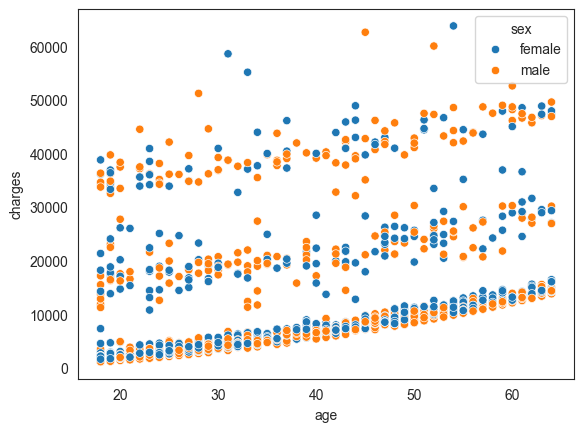

In [52]:
sns.scatterplot(x='age' , y='charges' , data=data , hue='sex')

<Axes: xlabel='age', ylabel='charges'>

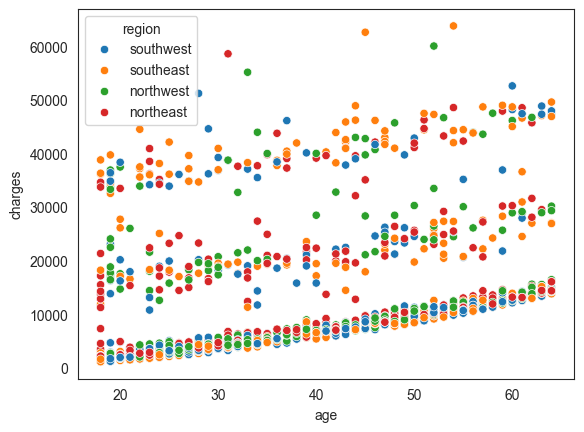

In [54]:
sns.scatterplot(x='age' , y='charges' , data=data , hue='region')

<Axes: xlabel='age', ylabel='charges'>

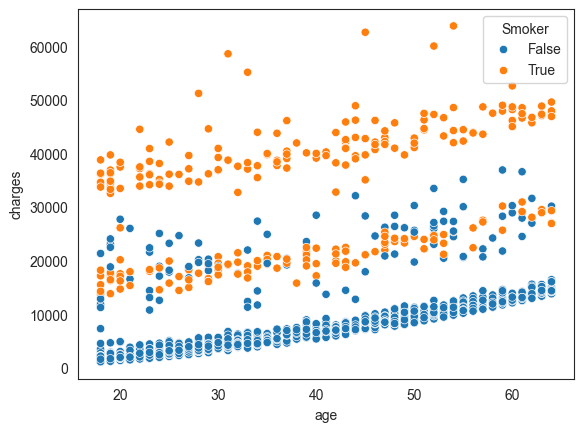

In [53]:
sns.scatterplot(x='age' , y='charges' , data=data , hue='Smoker')

### **Conclusion**
- `Hence we can conclude here that region is not as much important factor but age and Smoker is very important`
- `If a person with less age is not smoking then the charges will be less but if they are smoking then the charges will be high`
- `If a person with older age is not smoking then its charges is less as compared to when they are smoking`

<Axes: xlabel='bmi', ylabel='charges'>

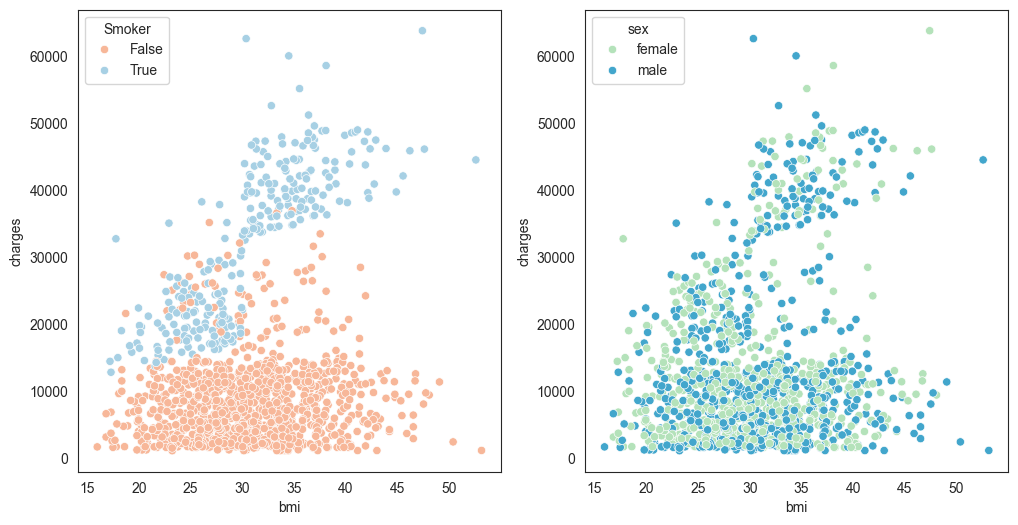

In [78]:
fig , ax  = plt.subplots(1,2 , figsize=(12,6))
sns.scatterplot(x='bmi' , y='charges' , data=data , hue='Smoker' , ax=ax[0] , palette='RdBu')
sns.scatterplot(x='bmi' , y='charges' , data=data , hue='sex' , ax=ax[1] , palette='GnBu')

In [80]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


In [81]:
data.drop(['sex' , 'region' , 'smoker'] , axis=1 , inplace=True)

In [82]:
data.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [85]:
data.corr()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


<Axes: >

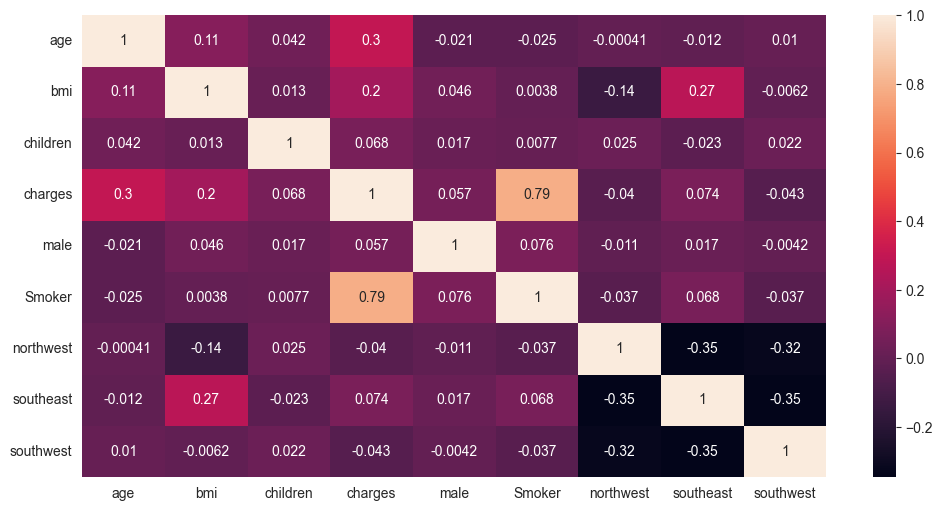

In [86]:
fig = plt.figure(figsize=(12,6))

sns.heatmap(data.corr() , annot=True)

#### Some Conclusions
- `charges is a very important factor`
- `bmi is a important factor`
- `Smoker is also a very important factor`

#### `Splitting the Data`

In [87]:
x = data.drop('charges' , axis=1)
y = data['charges']

In [92]:
# Input Data
x

,age,bmi,children,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [91]:
# Output Data
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.4)

In [99]:
x_train.shape

(802, 8)

In [100]:
x_test.shape

(536, 8)

### `Scaling the Data`

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [101]:
scaled_x_test.shape

(536, 8)

In [102]:
scaled_x_train.shape

(802, 8)

## `Support Vector Regression Model`

In [107]:
from sklearn.svm import SVR

model = SVR()


In [109]:
model.fit(scaled_x_train , y_train)

SVR()

In [110]:
pred = model.predict(scaled_x_test)

In [111]:
pred.shape

(536,)

In [113]:
pred[:10]

array([9593.78477727, 9519.47724504, 9539.32089813, 9586.13926368,
       9570.7221693 , 9567.70507024, 9525.46494784, 9518.93312922,
       9573.24277827, 9527.2558487 ])

In [114]:
y_test[:10]

1240    47269.85400
1202     2055.32490
167      6128.79745
376     21659.93010
889     11945.13270
701      9541.69555
163      5152.13400
137      2045.68525
1068    14349.85440
1277     4357.04365
Name: charges, dtype: float64